# Sartorious experiments data-plotting code

In [63]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Importing files
std = '817'
folder = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv")

df_cal = pd.read_csv(folder+r'/Viscosity_std_'+std+'_exp3_withacq.csv')

df_cal


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value
0,Viscosity_std_817,p1000,1000.0,25.000000,25.000000,0,5,5,0,-15.367352,90.000000,NaN
1,Viscosity_std_817,p1000,500.0,25.000000,25.000000,0,5,5,0,-10.087408,90.000000,NaN
2,Viscosity_std_817,p1000,300.0,25.000000,25.000000,0,5,5,0,-12.630916,90.000000,NaN
3,Viscosity_std_817,p1000,"mean[300, 500, 1000]",25.000000,25.000000,0,5,5,0,-12.695225,90.000000,NaN
4,Viscosity_std_817,p1000,1000.0,31.250000,31.250000,0,5,5,0,-12.697850,74.000000,NaN
5,Viscosity_std_817,p1000,500.0,31.250000,31.250000,0,5,5,0,-11.977321,74.000000,NaN
6,Viscosity_std_817,p1000,300.0,31.250000,31.250000,0,5,5,0,-16.646980,74.000000,NaN
7,Viscosity_std_817,p1000,"mean[300, 500, 1000]",31.250000,31.250000,0,5,5,0,-13.774050,74.000000,NaN
8,Viscosity_std_817,p1000,1000.0,31.250000,2.500000,0,5,5,0,-1.429246,442.000000,NaN
9,Viscosity_std_817,p1000,500.0,31.250000,2.500000,0,5,5,0,0.519726,442.000000,NaN


In [64]:
# Calculate time for 1000ul
df_cal['time_for_1000'] = 0
for i in range(len(df_cal)):
    if (df_cal['blow_out_rate'].iloc[i])<=0:
        df_cal['time_for_1000'].iloc[i] = 1000/df_cal["aspiration_rate"].iloc[i] + 1000/df_cal["dispense_rate"].iloc[i] + df_cal["delay_aspirate"].iloc[i] + df_cal["delay_dispense"].iloc[i] + df_cal["delay_blow_out"].iloc[i]
    else:
        df_cal['time_for_1000'].iloc[i] = 1000/df_cal["aspiration_rate"].iloc[i] + 1000/df_cal["dispense_rate"].iloc[i] + 150/df_cal["blow_out_rate"].iloc[i] + df_cal["delay_aspirate"].iloc[i] + df_cal["delay_dispense"].iloc[i] + df_cal["delay_blow_out"].iloc[i]
df_cal
# Getting unique values of time in a numpy array
#TM = df_cal['time_for_1000'].unique()
#TM

C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\3781546395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal['time_for_1000'].iloc[i] = 1000/df_cal["aspiration_rate"].iloc[i] + 1000/df_cal["dispense_rate"].iloc[i] + df_cal["delay_aspirate"].iloc[i] + df_cal["delay_dispense"].iloc[i] + df_cal["delay_blow_out"].iloc[i]


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,time_for_1000
0,Viscosity_std_817,p1000,1000.0,25.000000,25.000000,0,5,5,0,-15.367352,90.000000,NaN,90.000000
1,Viscosity_std_817,p1000,500.0,25.000000,25.000000,0,5,5,0,-10.087408,90.000000,NaN,90.000000
2,Viscosity_std_817,p1000,300.0,25.000000,25.000000,0,5,5,0,-12.630916,90.000000,NaN,90.000000
3,Viscosity_std_817,p1000,"mean[300, 500, 1000]",25.000000,25.000000,0,5,5,0,-12.695225,90.000000,NaN,90.000000
4,Viscosity_std_817,p1000,1000.0,31.250000,31.250000,0,5,5,0,-12.697850,74.000000,NaN,74.000000
5,Viscosity_std_817,p1000,500.0,31.250000,31.250000,0,5,5,0,-11.977321,74.000000,NaN,74.000000
6,Viscosity_std_817,p1000,300.0,31.250000,31.250000,0,5,5,0,-16.646980,74.000000,NaN,74.000000
7,Viscosity_std_817,p1000,"mean[300, 500, 1000]",31.250000,31.250000,0,5,5,0,-13.774050,74.000000,NaN,74.000000
8,Viscosity_std_817,p1000,1000.0,31.250000,2.500000,0,5,5,0,-1.429246,442.000000,NaN,442.000000
9,Viscosity_std_817,p1000,500.0,31.250000,2.500000,0,5,5,0,0.519726,442.000000,NaN,442.000000


#### Making a scatterplot

In [65]:
df_cal_mean = df_cal.loc[(df_cal['volume'] == "mean[300, 500, 1000]")]
df_cal_int = df_cal.loc[(df_cal['volume'] != "mean[300, 500, 1000]")]
df_cal_int["volume"] = df_cal_int["volume"].apply(pd.to_numeric)
df_cal_1000 = df_cal_int.loc[(df_cal_int['volume'] == 1000)]
df_cal_500 = df_cal_int.loc[(df_cal_int['volume'] == 500)]
df_cal_300 = df_cal_int.loc[(df_cal_int['volume'] == 300)]
df_cal_100 = df_cal_int.loc[(df_cal_int['volume'] == 100)]

count = 1
df_cal_1000['iteration']=0
df_cal_500['iteration']=0
df_cal_300['iteration']=0
df_cal_mean['iteration']=0
for i in range(len(df_cal_1000)):
    df_cal_1000['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(df_cal_500)):
    df_cal_500['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(df_cal_300)):
    df_cal_300['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(df_cal_mean)):
    df_cal_mean['iteration'].iloc[i]=count
    count+=1

C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\1833002406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_int["volume"] = df_cal_int["volume"].apply(pd.to_numeric)
C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\1833002406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_1000['iteration']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\1833002406.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [66]:
for i in range(len(df_cal_mean)):
    df_cal_mean["%error"].iloc[i]=(df_cal_1000["%error"].iloc[i]+df_cal_500["%error"].iloc[i]+df_cal_300["%error"].iloc[i])/3
df_cal_mean.head(10)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\368676123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_mean["%error"].iloc[i]=(df_cal_1000["%error"].iloc[i]+df_cal_500["%error"].iloc[i]+df_cal_300["%error"].iloc[i])/3


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,time_for_1000,iteration
3,Viscosity_std_817,p1000,"mean[300, 500, 1000]",25.000000,25.000000,0,5,5,0,-12.695225,90.000000,NaN,90.000000,1
7,Viscosity_std_817,p1000,"mean[300, 500, 1000]",31.250000,31.250000,0,5,5,0,-13.774050,74.000000,NaN,74.000000,2
11,Viscosity_std_817,p1000,"mean[300, 500, 1000]",31.250000,2.500000,0,5,5,0,0.027561,442.000000,NaN,442.000000,3
15,Viscosity_std_817,p1000,"mean[300, 500, 1000]",2.500000,31.250000,0,5,5,0,-5.419062,442.000000,NaN,442.000000,4
19,Viscosity_std_817,p1000,"mean[300, 500, 1000]",2.500000,2.500000,0,5,5,0,8.973147,810.000000,NaN,810.000000,5
23,Viscosity_std_817,p1000,"mean[300, 500, 1000]",26.979642,8.980158,0,5,5,0,-4.938709,158.421597,53.907634,158.421597,6
27,Viscosity_std_817,p1000,"mean[300, 500, 1000]",19.630164,6.392805,0,5,5,0,0.290049,217.367862,28.557574,217.367862,7
31,Viscosity_std_817,p1000,"mean[300, 500, 1000]",16.556084,12.276070,0,5,5,0,-1.534241,151.860050,51.074208,151.860050,8
35,Viscosity_std_817,p1000,"mean[300, 500, 1000]",15.794196,5.571149,0,5,5,0,2.631441,252.810586,43.107516,252.810586,9
39,Viscosity_std_817,p1000,"mean[300, 500, 1000]",11.235564,17.525777,0,5,5,0,-4.665722,156.061907,27.231632,156.061907,10


In [ ]:
# Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
#axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
#axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder1 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs")
#fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_updated.png')

In [ ]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

"""# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')
"""
# Plotting graph 1: Iteration against error
axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].plot(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = '300', c = 'orange')
axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', c = 'red')
axs[1].plot(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].plot(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')


axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')
#fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_scatter_updated.png')


In [67]:
folder2 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Std_calibrations")

df_calibrations = pd.read_csv(folder2+r'/Viscosity_std_'+std+'.csv')

calibration_drop=df_calibrations.drop_duplicates(subset=["volume","aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"], keep='first')
calibration_drop['time_for_1000']=0
for i in range(len(calibration_drop)):
    if (calibration_drop['blow_out_rate'].iloc[i])<=0:
        calibration_drop['time_for_1000'].iloc[i] = 1000/calibration_drop["aspiration_rate"].iloc[i] + 1000/calibration_drop["dispense_rate"].iloc[i] + calibration_drop["delay_aspirate"].iloc[i] + calibration_drop["delay_dispense"].iloc[i] + calibration_drop["delay_blow_out"].iloc[i]
    else:
        calibration_drop['time_for_1000'].iloc[i] = 1000/calibration_drop["aspiration_rate"].iloc[i] + 1000/calibration_drop["dispense_rate"].iloc[i] + 150/calibration_drop["blow_out_rate"].iloc[i] + calibration_drop["delay_aspirate"].iloc[i] + calibration_drop["delay_dispense"].iloc[i] + calibration_drop["delay_blow_out"].iloc[i]
calibration_drop

C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\2141755623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_drop['time_for_1000']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\2141755623.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_drop['time_for_1000'].iloc[i] = 1000/calibration_drop["aspiration_rate"].iloc[i] + 1000/calibration_drop["dispense_rate"].iloc[i] + calibration_drop["delay_aspirate"].iloc[i] + calibration_drop["delay_dispense"].iloc[i] + calibration_drop["delay_blow_out"].iloc[i]


,liquid,Viscosity 10 s-1,Viscosity 100 s-1,Viscosity 900 s-1,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,time,%error,m_measured,m_expected,time_for_1000
0,Viscosity_std_817,817,817,817,p1000,1000,25,12.5,0,3,3,0,True,False,134.741617,-12.544295,0.7404,0.84660,126
1,Viscosity_std_817,817,817,817,p1000,1000,20,10.0,0,3,3,0,True,False,167.963969,-2.988424,0.8213,0.84660,156
4,Viscosity_std_817,817,817,817,p1000,1000,20,8.0,0,3,3,0,True,False,191.956782,-2.716749,0.8236,0.84660,181
5,Viscosity_std_817,817,817,817,p1000,500,20,10.0,0,3,3,0,True,False,90.356724,-7.347035,0.3922,0.42330,156
6,Viscosity_std_817,817,817,817,p1000,500,20,8.0,0,3,3,0,True,False,102.005163,-6.071344,0.3976,0.42330,181
7,Viscosity_std_817,817,817,817,p1000,500,20,8.0,0,3,5,0,True,False,104.016702,-5.693362,0.3992,0.42330,183
8,Viscosity_std_817,817,817,817,p1000,500,20,8.0,0,5,5,0,True,False,106.041316,-2.031656,0.4147,0.42330,185
9,Viscosity_std_817,817,817,817,p1000,300,20,8.0,0,5,5,0,True,False,70.248710,-1.567053,0.2500,0.25398,185
14,Viscosity_std_817,817,817,817,p1000,1000,20,8.0,0,5,5,0,True,False,195.878941,-1.263879,0.8359,0.84660,185


In [68]:
calibration_1000 = calibration_drop.loc[(calibration_drop['volume'] == 1000)]
calibration_500 = calibration_drop.loc[(calibration_drop['volume'] == 500)]
calibration_300 = calibration_drop.loc[(calibration_drop['volume'] == 300)]
count = 1
calibration_1000['iteration']=0
calibration_500['iteration']=0
calibration_300['iteration']=0
for i in range(len(calibration_1000)):
    calibration_1000['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(calibration_500)):
    calibration_500['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(calibration_300)):
    calibration_300['iteration'].iloc[i]=count
    count+=1

C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\2344505822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_1000['iteration']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\2344505822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_500['iteration']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_26764\2344505822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
df_cal_300.head(20)

In [ ]:
calibration_300.head(20)

In [ ]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Plotting graph 1: Iteration against error
axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'black', mec="red", linewidth=0.8)
axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'black', mec="green", linewidth=0.8)
axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'black', mec="blue", linewidth=0.8)
axs[0].plot(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'black', mec="orange", linewidth=0.8)
axs[0].plot(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', label = 'cal1000', c = 'purple', mec="grey", linewidth=0.8)
axs[0].plot(calibration_500['iteration'],calibration_500['%error'], marker= 'x', label = 'cal500', c = 'purple', mec="pink", linewidth=0.8)
axs[0].plot(calibration_300['iteration'],calibration_300['%error'], marker= 'x', label = 'cal300', c = 'purple', mec="yellow", linewidth=0.8)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'black', mec="orange", linewidth=0.8)
axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'black', mec="red", linewidth=0.8)
axs[1].plot(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'black', mec="green", linewidth=0.8)
axs[1].plot(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'black', mec="blue", linewidth=0.8)
axs[1].plot(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', label = 'cal1000', c = 'purple', mec="grey", linewidth=0.8)
axs[1].plot(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', label = 'cal500', c = 'purple', mec="pink", linewidth=0.8)
axs[1].plot(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', label = 'cal300', c = 'purple', mec="yellow", linewidth=0.8)

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')
#fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_scatter_updated_with_cali.png')

In [ ]:
fig,axs = plt.subplots(2,1)

"""# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')"""

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')
axs[0].scatter(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', label = 'cal1000', c="grey")
axs[0].scatter(calibration_500['iteration'],calibration_500['%error'], marker= 'x', label = 'cal500', c="pink")
axs[0].scatter(calibration_300['iteration'],calibration_300['%error'], marker= 'x', label = 'cal300', c="yellow")

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')
axs[1].scatter(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', label = 'cal1000', c="grey")
axs[1].scatter(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', label = 'cal500', c="pink")
axs[1].scatter(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', label = 'cal300', c="yellow")

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder1 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs")
#fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_updated_with_cali.png')


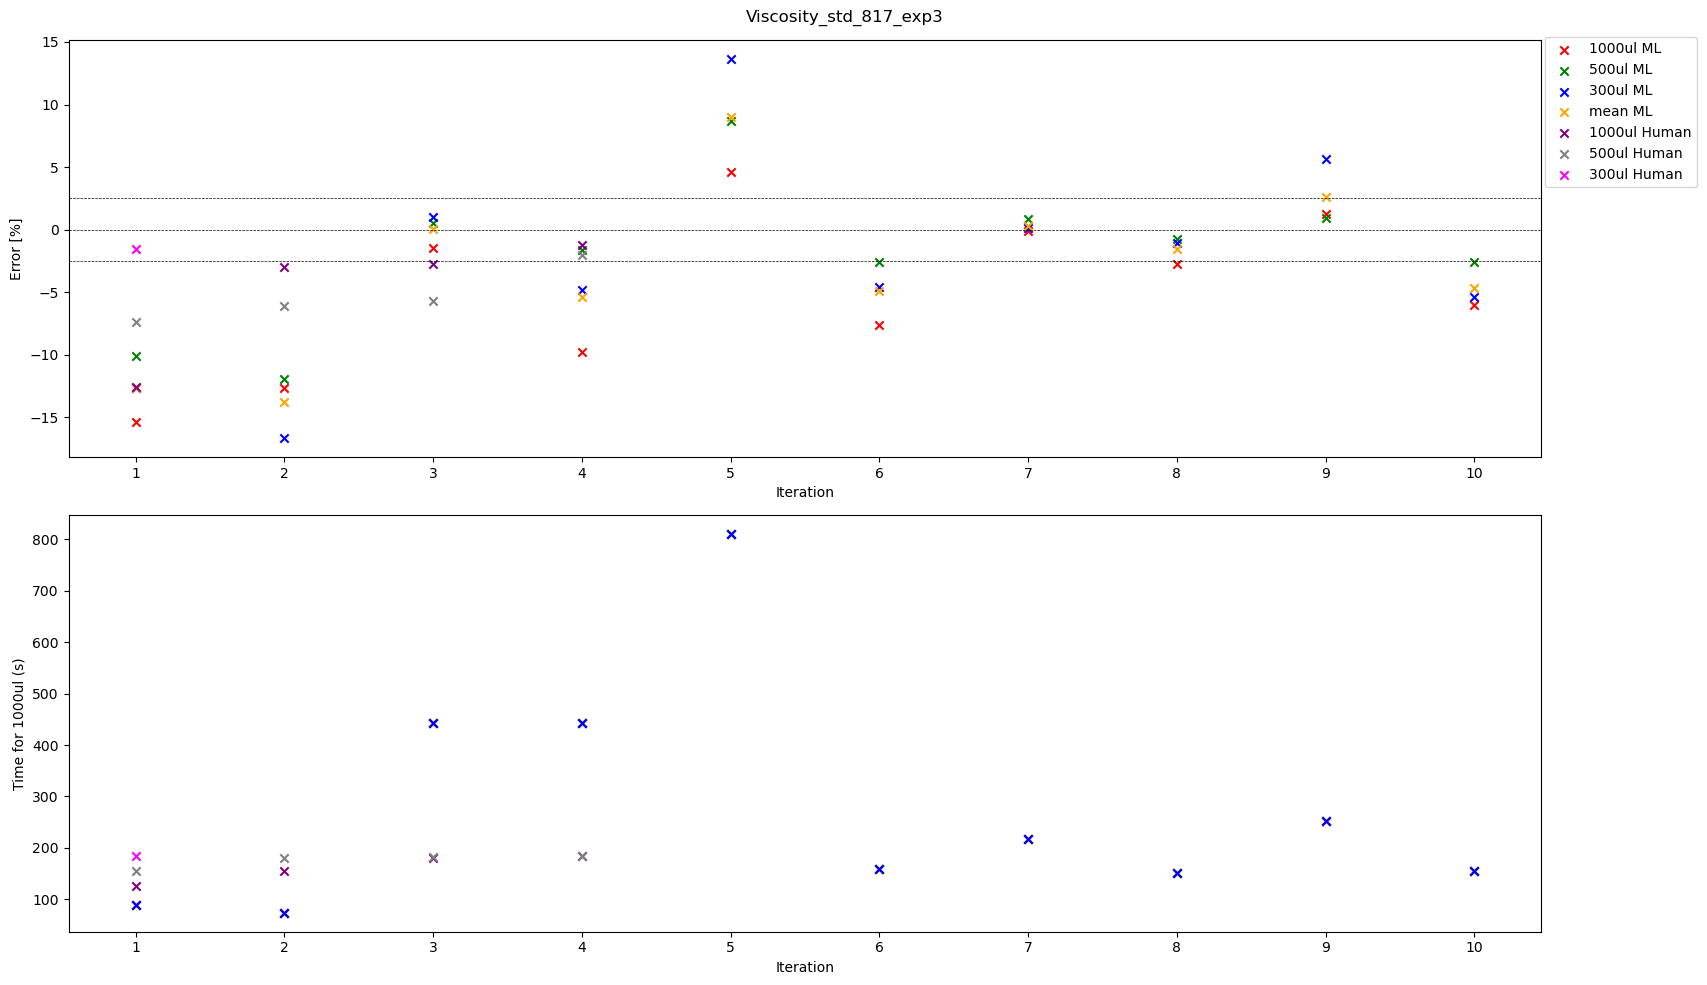

In [71]:
fig,axs = plt.subplots(2,1)

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000ul ML', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500ul ML', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300ul ML', c = 'blue')
axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean ML', c = 'orange')
axs[0].scatter(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', c="purple", label = '1000ul Human')
axs[0].scatter(calibration_500['iteration'],calibration_500['%error'], marker= 'x', c="grey", label = '500ul Human')
axs[0].scatter(calibration_300['iteration'],calibration_300['%error'], marker= 'x', c="magenta", label = '300ul Human')

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean ML', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000ul ML', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500ul ML', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300ul ML', c = 'blue')
axs[1].scatter(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', c="purple", label = '1000ul Human')
axs[1].scatter(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', c="grey", label = '500ul Human')
axs[1].scatter(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', c="magenta", label = '300ul Human')

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1105,1.025))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder3 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs\Updated with blow out")
fig.savefig(folder3+r'/'+'Viscosity_std_'+std+'_exp3.png')

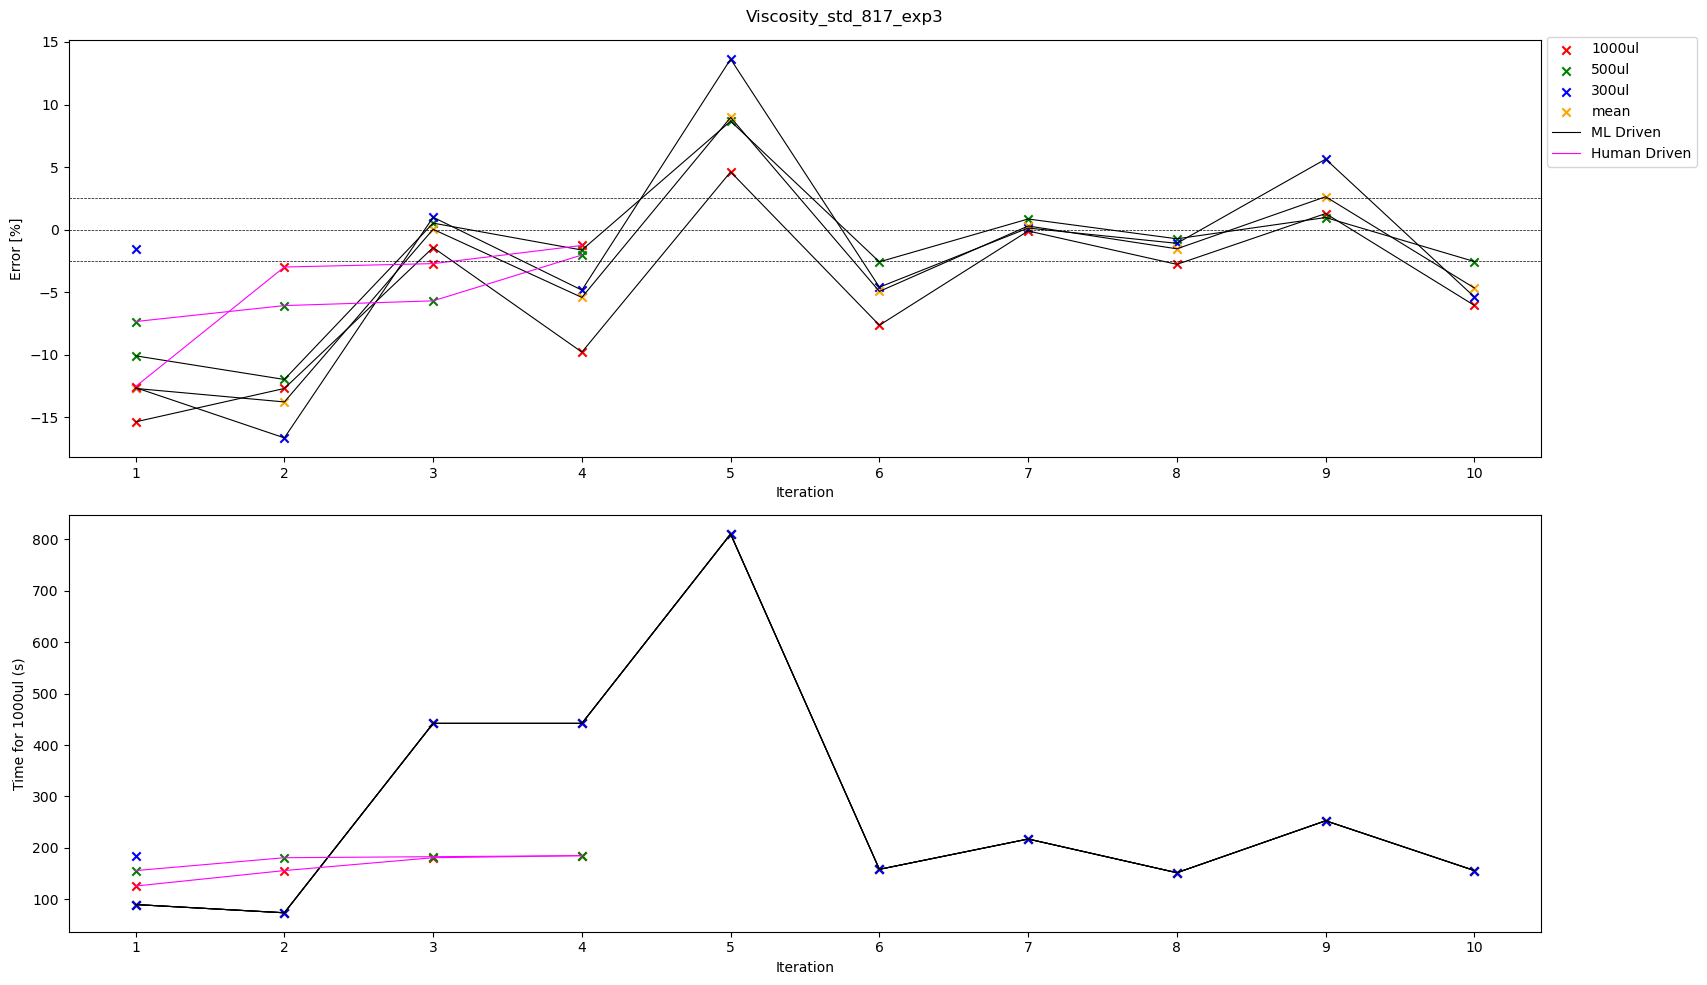

In [72]:
fig,axs = plt.subplots(2,1)

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000ul', c = 'red')
axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], c = 'black', linewidth=0.8)
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500ul', c = 'green')
axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], c = 'black', linewidth=0.8)
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300ul', c = 'blue')
axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], c = 'black', linewidth=0.8)
axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')
axs[0].plot(df_cal_mean['iteration'],df_cal_mean['%error'], label = 'ML Driven', c = 'black', linewidth=0.8)
axs[0].scatter(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', c="red")
axs[0].plot(calibration_1000['iteration'],calibration_1000['%error'], c = 'magenta', linewidth=0.8)
axs[0].scatter(calibration_500['iteration'],calibration_500['%error'], marker= 'x', c="green")
axs[0].plot(calibration_500['iteration'],calibration_500['%error'], c = 'magenta', linewidth=0.8)
axs[0].scatter(calibration_300['iteration'],calibration_300['%error'], marker= 'x', c="blue")
axs[0].plot(calibration_300['iteration'],calibration_300['%error'], label = 'Human Driven', c = 'magenta', linewidth=0.8)

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')
axs[1].scatter(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', c="red")
axs[1].scatter(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', c="green")
axs[1].scatter(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', c="blue")
axs[1].plot(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], c = 'black', linewidth=0.8)
axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], c = 'black', linewidth=0.8)
axs[1].plot(df_cal_500['iteration'],df_cal_500['time_for_1000'], c = 'black', linewidth=0.8)
axs[1].plot(df_cal_300['iteration'],df_cal_300['time_for_1000'], label = 'ML Driven', c = 'black', linewidth=0.8)
axs[1].plot(calibration_1000['iteration'],calibration_1000['time_for_1000'], c = 'magenta', linewidth=0.8)
axs[1].plot(calibration_500['iteration'],calibration_500['time_for_1000'], c = 'magenta', linewidth=0.8)
axs[1].plot(calibration_300['iteration'],calibration_300['time_for_1000'], label = 'Human Driven', c = 'magenta', linewidth=0.8)

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1105,1.025))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder3 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs\Updated with blow out")
fig.savefig(folder3+r'/'+'Viscosity_std_'+std+'_exp3_scatter.png')
